https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db?resource=download

In [ ]:
#Pyspark installation
!pip install pyspark --quiet
!pip install -U -q PyDrive --quiet 
!apt install openjdk-8-jdk-headless &> /dev/null

     |████████████████████████████████| 281.3 MB 34 kB/s 
     |████████████████████████████████| 199 kB 41.8 MB/s 


In [ ]:
#Begin Spark session and load in CSV
import csv
import pandas as pd
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .getOrCreate()

sc = spark.sparkContext

file = pd.read_csv("/content/drive/MyDrive/Capstone/SpotifyFeatures.csv")

In [ ]:
file.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
print("Popularity Max        Popularity Min")
print("-------------------------------------")
print(max(file.popularity), '                 ', min(file.popularity)) 

Popularity Max        Popularity Min
-------------------------------------
100                   0


In [ ]:
#Check for any obscure genres, children's music had two genres
file.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [ ]:
new_df = file.copy()

In [ ]:
# Place childrens music different columns under same column
new_df['genre'] = file['genre'].replace(['Children\'s Music'], 'Children’s Music')

In [ ]:
new_df.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children’s Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

In [ ]:
new_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [ ]:
new_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


In [ ]:
categorical_columns = ['genre', 'key', 'mode', 'time_signature']
numerical_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 
                     'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
target_column = ['popularity']
print("Features of Spotify Dataset")
print("---------------------------")
for i in ['artist_name', 'track_name',	'track_id']:
  print(i.title())

for i in categorical_columns:
  print(i.title())
for i in numerical_columns:
  print(i.title())

Features of Spotify Dataset
---------------------------
Artist_Name
Track_Name
Track_Id
Genre
Key
Mode
Time_Signature
Acousticness
Danceability
Duration_Ms
Energy
Instrumentalness
Liveness
Loudness
Speechiness
Tempo
Valence
Popularity


In [ ]:
new_df.shape

(232725, 18)

In [ ]:
#Convert to spark df
df = spark.createDataFrame(new_df)

In [ ]:
df.printSchema()

root
 |-- genre: string (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- track_id: string (nullable = true)
 |-- popularity: long (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: string (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: string (nullable = true)
 |-- valence: double (nullable = true)



In [ ]:
# Checking if any songs have 100 popularity which is extremely popular
df.filter(df.popularity == 100).show()

+-----+-------------+----------+--------------------+----------+------------+------------+-----------+------+----------------+---+--------+--------+-----+-----------+------+--------------+-------+
|genre|  artist_name|track_name|            track_id|popularity|acousticness|danceability|duration_ms|energy|instrumentalness|key|liveness|loudness| mode|speechiness| tempo|time_signature|valence|
+-----+-------------+----------+--------------------+----------+------------+------------+-----------+------+----------------+---+--------+--------+-----+-----------+------+--------------+-------+
|Dance|Ariana Grande|   7 rings|14msK75pk3pA33pzP...|       100|       0.578|       0.725|     178640| 0.321|             0.0| C#|  0.0884| -10.744|Minor|      0.323|70.142|           4/4|  0.319|
|  Pop|Ariana Grande|   7 rings|14msK75pk3pA33pzP...|       100|       0.578|       0.725|     178640| 0.321|             0.0| C#|  0.0884| -10.744|Minor|      0.323|70.142|           4/4|  0.319|
+-----+--------

In [ ]:
# Check if same songs but labeled as different genre have different popularity
df.filter((df.artist_name == 'System Of A Down') & (df.track_name == 'Chop Suey!')).show()

# they do have different popularity so genre label can be integral for popularity, did not remove
# duplicate songs for that reason

+----------------+----------------+----------+--------------------+----------+------------+------------+-----------+------+----------------+---+--------+--------+-----+-----------+-------+--------------+-------+
|           genre|     artist_name|track_name|            track_id|popularity|acousticness|danceability|duration_ms|energy|instrumentalness|key|liveness|loudness| mode|speechiness|  tempo|time_signature|valence|
+----------------+----------------+----------+--------------------+----------+------------+------------+-----------+------+----------------+---+--------+--------+-----+-----------+-------+--------------+-------+
|     Alternative|System Of A Down|Chop Suey!|2DlHlPMa4M17kufBv...|        77|     2.78E-4|       0.419|     210240| 0.934|          0.0015|  G|   0.132|  -3.908|Minor|       0.12|127.288|           4/4|  0.286|
|Children’s Music|System Of A Down|Chop Suey!|2DlHlPMa4M17kufBv...|        80|     2.78E-4|       0.419|     210240| 0.934|          0.0015|  G|   0.132

In [ ]:
df.distinct().count()

232725

In [ ]:
# Check for null values
new_df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [ ]:
# drop info columns
info_columns = ['artist_name', 'track_name', 'track_id']
df_usable = new_df.drop(columns = info_columns)
df_usable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   popularity        232725 non-null  int64  
 2   acousticness      232725 non-null  float64
 3   danceability      232725 non-null  float64
 4   duration_ms       232725 non-null  int64  
 5   energy            232725 non-null  float64
 6   instrumentalness  232725 non-null  float64
 7   key               232725 non-null  object 
 8   liveness          232725 non-null  float64
 9   loudness          232725 non-null  float64
 10  mode              232725 non-null  object 
 11  speechiness       232725 non-null  float64
 12  tempo             232725 non-null  float64
 13  time_signature    232725 non-null  object 
 14  valence           232725 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 26.6+ MB


In [ ]:
df_usable = spark.createDataFrame(df_usable)

In [ ]:
#Create list of columns based on data type
categorical_columns = ['genre', 'key', 'mode', 'time_signature']
numerical_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 
                     'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
target_column = ['popularity']

In [ ]:
df_categorical = df_usable[categorical_columns]
df_numeric = df_usable[numerical_columns]

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler, VectorAssembler

In [ ]:
# Create vectors of column value and placed into column with new name
# Create scaled column vectors and placed into new column with new name
# Pass through pipeline transformation to achieve scaled values and put all columns 
# (Vector, Unscaled, Scaled vectors) into one spark dataframe
assemblers = [VectorAssembler(inputCols=[col], outputCol= col + '_vec') for col in numerical_columns]
scalers = [MinMaxScaler(inputCol=col+'_vec', outputCol=col + '_scaled') for col in numerical_columns]

pipeline = Pipeline(stages=assemblers + scalers)
model_min_max_scaler = pipeline.fit(df_numeric)
df_numeric_scaled = model_min_max_scaler.transform(df_numeric)
df_numeric_scaled.show()



+------------+------------+-----------+------+----------------+--------+--------+-----------+-------+-------+----------+----------------+----------------+---------------+----------+--------------------+------------+------------+---------------+---------+-----------+--------------+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------------+--------------------+--------------------+--------------------+--------------+-----------------+
|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|popularity|acousticness_vec|danceability_vec|duration_ms_vec|energy_vec|instrumentalness_vec|liveness_vec|loudness_vec|speechiness_vec|tempo_vec|valence_vec|popularity_vec| acousticness_scaled| danceability_scaled|  duration_ms_scaled|       energy_scaled|instrumentalness_scaled|     liveness_scaled|     loudness_scaled|  speechiness_scaled|        tempo_scaled|valence_scaled|popul

In [ ]:
# drop unscaled columns
df_numeric_scaled = df_numeric_scaled.drop(*numerical_columns)

In [ ]:
# create list of vector column names
vec_numerical_columns = [i + '_vec'for i in numerical_columns]
vec_numerical_columns

['acousticness_vec',
 'danceability_vec',
 'duration_ms_vec',
 'energy_vec',
 'instrumentalness_vec',
 'liveness_vec',
 'loudness_vec',
 'speechiness_vec',
 'tempo_vec',
 'valence_vec',
 'popularity_vec']

In [ ]:
# drop unused unscaled vector columns
df_numeric_scaled = df_numeric_scaled.drop(*vec_numerical_columns)

In [ ]:
df_numeric_scaled

DataFrame[acousticness_scaled: vector, danceability_scaled: vector, duration_ms_scaled: vector, energy_scaled: vector, instrumentalness_scaled: vector, liveness_scaled: vector, loudness_scaled: vector, speechiness_scaled: vector, tempo_scaled: vector, valence_scaled: vector, popularity_scaled: vector]

In [ ]:
import pyspark.sql.functions as f
# remove scaled label at the end of scaled columns for whole dataset
df_numeric_scaled = df_numeric_scaled.select([f.col(col).alias(col.replace('_scaled', '')) for col in df_numeric_scaled.columns])

In [ ]:
df_numeric_scaled.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+----------+
|        acousticness|        danceability|         duration_ms|              energy|    instrumentalness|            liveness|            loudness|         speechiness|               tempo| valence|popularity|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+----------+
|[0.6134538152610441]| [0.356292243321532]|[0.01516668984186...|[0.9109091005552965]|               [0.0]|[0.33961406803792...|[0.9008558566573548]|[0.03207027942421...|[0.6427038828555833]| [0.814]|     [0.0]|
|[0.24698795180722...|[0.5719343418088187]|[0.02202895514787...|[0.7377324083762662]|               [0.0]|[0.14271000575565...|  [0.83446913755983]|[0.06837

In [ ]:
df_numeric_scaled.dtypes

[('acousticness', 'vector'),
 ('danceability', 'vector'),
 ('duration_ms', 'vector'),
 ('energy', 'vector'),
 ('instrumentalness', 'vector'),
 ('liveness', 'vector'),
 ('loudness', 'vector'),
 ('speechiness', 'vector'),
 ('tempo', 'vector'),
 ('valence', 'vector'),
 ('popularity', 'vector')]

In [ ]:
# Since data was converted to scaled vector, row values are vector
# must convert each row value back to float
from pyspark.sql.types import FloatType
element = f.udf(lambda x:float(x[0]), FloatType())
df_numeric_scaled = df_numeric_scaled.select([element(col).alias(col) for col in df_numeric_scaled.columns])

In [ ]:
df_categorical.show()

+-----+---+-----+--------------+
|genre|key| mode|time_signature|
+-----+---+-----+--------------+
|Movie| C#|Major|           4/4|
|Movie| F#|Minor|           4/4|
|Movie|  C|Minor|           5/4|
|Movie| C#|Major|           4/4|
|Movie|  F|Major|           4/4|
|Movie| C#|Major|           4/4|
|Movie| C#|Major|           4/4|
|Movie| F#|Major|           4/4|
|Movie|  C|Major|           4/4|
|Movie|  G|Major|           4/4|
|Movie|  E|Minor|           4/4|
|Movie|  C|Major|           4/4|
|Movie| F#|Minor|           4/4|
|Movie| D#|Major|           3/4|
|Movie|  G|Major|           4/4|
|Movie| G#|Major|           3/4|
|Movie|  D|Major|           3/4|
|Movie|  E|Major|           4/4|
|Movie|  D|Major|           3/4|
|Movie| C#|Major|           4/4|
+-----+---+-----+--------------+
only showing top 20 rows



In [ ]:
# Convert to Pandas DF
df_categorical = df_categorical.toPandas()

In [ ]:
# One Hot Encoded
df_categorical_one_hot = pd.get_dummies(df_categorical)

In [ ]:
df_categorical_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   genre_A Capella         232725 non-null  uint8
 1   genre_Alternative       232725 non-null  uint8
 2   genre_Anime             232725 non-null  uint8
 3   genre_Blues             232725 non-null  uint8
 4   genre_Children’s Music  232725 non-null  uint8
 5   genre_Classical         232725 non-null  uint8
 6   genre_Comedy            232725 non-null  uint8
 7   genre_Country           232725 non-null  uint8
 8   genre_Dance             232725 non-null  uint8
 9   genre_Electronic        232725 non-null  uint8
 10  genre_Folk              232725 non-null  uint8
 11  genre_Hip-Hop           232725 non-null  uint8
 12  genre_Indie             232725 non-null  uint8
 13  genre_Jazz              232725 non-null  uint8
 14  genre_Movie             232725 non-null  uint8
 15  

In [ ]:
df_numeric_scaled = df_numeric_scaled.toPandas()

In [ ]:
df_numeric_scaled

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.613454,0.356292,0.015167,0.910909,0.000000,0.339614,0.900856,0.032070,0.642704,0.814,0.00
1,0.246988,0.571934,0.022029,0.737732,0.000000,0.142710,0.834469,0.068374,0.675801,0.816,0.01
2,0.955823,0.650252,0.027969,0.131113,0.000000,0.094241,0.686429,0.014818,0.325182,0.368,0.03
3,0.705823,0.196438,0.024747,0.326313,0.000000,0.089697,0.716695,0.018311,0.665238,0.227,0.00
4,0.953815,0.294067,0.012142,0.225209,0.123123,0.194208,0.557054,0.024767,0.518516,0.390,0.04
...,...,...,...,...,...,...,...,...,...,...,...
232720,0.003855,0.676000,0.056136,0.714709,0.544545,0.075561,0.744311,0.009949,0.400722,0.962,0.39
232721,0.033032,0.781139,0.048227,0.683677,0.000881,0.229550,0.809825,0.012172,0.392666,0.969,0.38
232722,0.904619,0.493617,0.027372,0.419408,0.000000,0.085658,0.786018,0.133150,0.252941,0.813,0.47
232723,0.263052,0.738226,0.037391,0.704699,0.000000,0.326487,0.806391,0.131033,0.327737,0.489,0.44


In [ ]:
# Place into one dataframe
df_preprocessed = pd.concat([df_numeric_scaled, df_categorical_one_hot], axis = 1)

In [ ]:
import numpy as np
X = df_preprocessed.drop(columns = ['popularity'])
X
Y = df_preprocessed['popularity']
Y

0         0.00
1         0.01
2         0.03
3         0.00
4         0.04
          ... 
232720    0.39
232721    0.38
232722    0.47
232723    0.44
232724    0.35
Name: popularity, Length: 232725, dtype: float32

In [ ]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
%%time
lr = LinearRegression()

mse_lr = []
rmse_lr = []
r2_lr = []
y_pred_lr = []
y_test_lr = []

r2 = 0
for train_index, test_index in cv.split(X):
    n = 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model = lr.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_lr.append(mean_squared_error(y_test, y_pred, squared = False))
    mse_lr.append(mean_squared_error(y_test, y_pred, squared = True))
    r2_lr.append(r2_score(y_test, y_pred))
    if r2 == 0 or r2_lr[n] > r2:
      r2 = r2_score(y_test, y_pred)
      y_pred_lr = y_pred
      y_test_lr = y_test
    n += 1

print("Metrics for best performing Linear Regression model")
print("---------------------------------------------------")
print("MSE:", min(mse_lr))
print("RMSE:", min(rmse_lr))
print("R^2:", max(r2_lr))
print("---------------------------------------------------")

Metrics for best performing Linear Regression model
---------------------------------------------------
MSE: 0.012348584
RMSE: 0.11112418
R^2: 0.6287180211686056
---------------------------------------------------
CPU times: user 7.5 s, sys: 1.42 s, total: 8.92 s
Wall time: 5.41 s


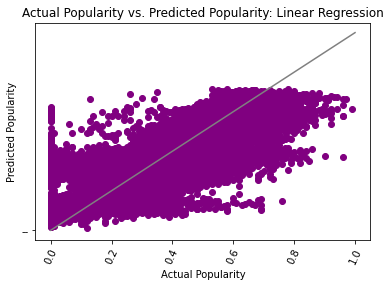

In [ ]:
x = np.linspace(0.0,1.0,100)

y = x
    

color = ['purple']
plt.scatter(x=y_test_lr, y=y_pred_lr, c = color)
plt.plot(x,y, 'grey', '--')
plt.title("Actual Popularity vs. Predicted Popularity: Linear Regression")
plt.ylabel("Predicted Popularity")
plt.xlabel("Actual Popularity")
plt.tick_params('x', rotation = 65)
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
lr.coef_

(pd.DataFrame({'coef':lr.coef_, 'category':X.columns})
.sort_values(by = 'coef', ascending = False)
.set_index('category'))

,coef
category,
time_signature_0/4,170.170151
time_signature_4/4,170.128448
time_signature_5/4,170.125000
time_signature_3/4,170.119629
time_signature_1/4,170.117004
key_F#,40.219810
key_G#,40.216576
key_C#,40.215973
key_B,40.214645


In [ ]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0)

mse_rf = []
rmse_rf = []
r2_rf = []
y_pred_rf = []
y_test_rf = []
r2 = 0

for train_index, test_index in cv.split(X):
    n=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model = rf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_rf.append(mean_squared_error(y_test, y_pred, squared = False))
    mse_rf.append(mean_squared_error(y_test, y_pred, squared = True))
    r2_rf.append(r2_score(y_test, y_pred))
    if r2 == 0 or r2_rf[n] > r2:
      r2 = r2_score(y_test, y_pred)
      y_pred_rf = y_pred
      y_test_rf = y_test
    n += 1
print("Metrics for best performing Random Forest model")
print("-----------------------------------------------")
print("MSE:", min(mse_rf))
print("RMSE:", min(rmse_rf))
print("R^2:", max(r2_rf))
print("-----------------------------------------------")


Metrics for best performing Random Forest model
-----------------------------------------------
MSE: 0.02508184219117359
RMSE: 0.15837247927330553
R^2: 0.24044417852733324
-----------------------------------------------
CPU times: user 5min 46s, sys: 599 ms, total: 5min 46s
Wall time: 5min 48s


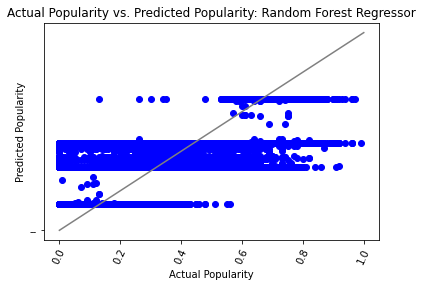

In [ ]:
color = ['blue']
plt.scatter(x=y_test_rf, y=y_pred_rf, c = color)
plt.plot(x,y, 'grey', '--')
plt.title("Actual Popularity vs. Predicted Popularity: Random Forest Regressor")
plt.ylabel("Predicted Popularity")
plt.xlabel("Actual Popularity")
plt.tick_params('x', rotation = 65)
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
rf.feature_importances_

(pd.DataFrame({'coef':lr.coef_, 'category':X.columns})
.sort_values(by = 'coef', ascending = False)
.set_index('category'))

,coef
category,
time_signature_0/4,170.170151
time_signature_4/4,170.128448
time_signature_5/4,170.125000
time_signature_3/4,170.119629
time_signature_1/4,170.117004
key_F#,40.219810
key_G#,40.216576
key_C#,40.215973
key_B,40.214645


In [ ]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

In [ ]:
%%time
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(objective ='reg:squarederror')


mse_xgb = []
rmse_xgb = []
r2_xgb = []
y_pred_xgb = []
y_test_xgb = []
r2 = 0
for train_index, test_index in cv.split(X):
    n=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model = xgb.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_xgb.append(mean_squared_error(y_test, y_pred, squared = False))
    mse_xgb.append(mean_squared_error(y_test, y_pred, squared = True))
    r2_xgb.append(r2_score(y_test, y_pred))
  
    if r2 == 0 or r2_xgb[n] > r2:
      r2 = r2_score(y_test, y_pred)
      y_pred_xgb = y_pred
      y_test_xgb = y_test
    n += 1

print("Metrics for best performing XGBoost model")
print("-----------------------------------------")
print("MSE:", min(mse_xgb))
print("RMSE:", min(rmse_xgb))
print("R^2:", max(r2_xgb))
print("-----------------------------------------")

Metrics for best performing XGBoost model
-----------------------------------------
MSE: 0.011454776
RMSE: 0.10702699
R^2: 0.6521474798156409
-----------------------------------------
CPU times: user 4min 54s, sys: 685 ms, total: 4min 54s
Wall time: 4min 57s


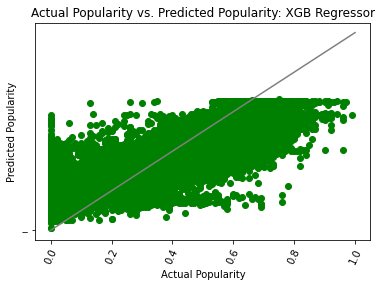

In [ ]:
color = ['green']
plt.scatter(x=y_test_xgb, y=y_pred_xgb, c = color)
plt.plot(x,y, 'grey', '--')
plt.title("Actual Popularity vs. Predicted Popularity: XGB Regressor")
plt.ylabel("Predicted Popularity")
plt.xlabel("Actual Popularity")
plt.tick_params('x', rotation = 65)
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
xgb.feature_importances_

(pd.DataFrame({'coef':lr.coef_, 'category':X.columns})
.sort_values(by = 'coef', ascending = False)
.set_index('category'))

,coef
category,
time_signature_0/4,170.170151
time_signature_4/4,170.128448
time_signature_5/4,170.125000
time_signature_3/4,170.119629
time_signature_1/4,170.117004
key_F#,40.219810
key_G#,40.216576
key_C#,40.215973
key_B,40.214645
